In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

In [ ]:
X = dataset.iloc[:, [3, 4]].values

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


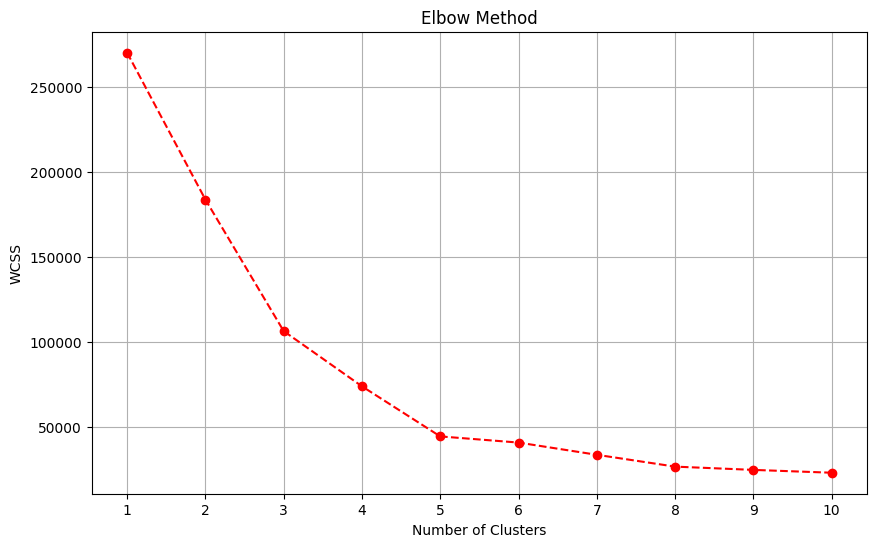

In [ ]:
from sklearn.cluster import KMeans

wcss_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--',c="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

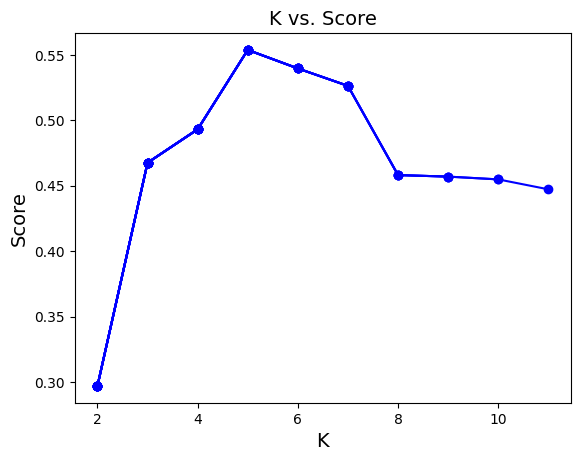

In [ ]:
from sklearn.metrics import silhouette_score
k_choose = np.arange(2, 12, 1)

k_with_score = {}
for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
    each_kmeans.fit(X)

    ## Get score
    k_with_score[k] = silhouette_score(X, each_kmeans.labels_)
    plt.plot(k_with_score.keys(), k_with_score.values(), 'bo-')
plt.title('K vs. Score', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()

Cluster Centers: [3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 1 0 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1]


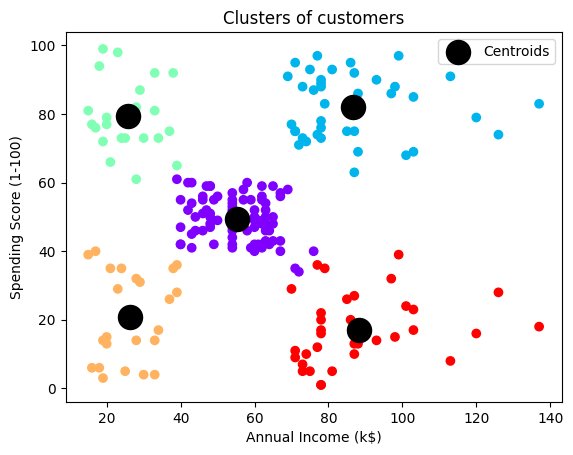

In [ ]:
kmeans = KMeans(
    n_clusters=5, n_init=10, random_state=42) ## Create instance
kmeans.fit(X) ## Fit the KMeans model to the data

kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(X)

print('Cluster Centers:', y_kmeans)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=300, c='black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()